# Компьютерная геометрия и геометрическое моделирование
## Лабораторная работа №7
- Ф.И.О: **Мухамедияр Адиль**
- Ноиер студ. билета: **1032205725**
- Группа: **НКНбд-01-20**

In [24]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import CubicSpline

## №1

Для начала начнем с построения графика для первого случая.

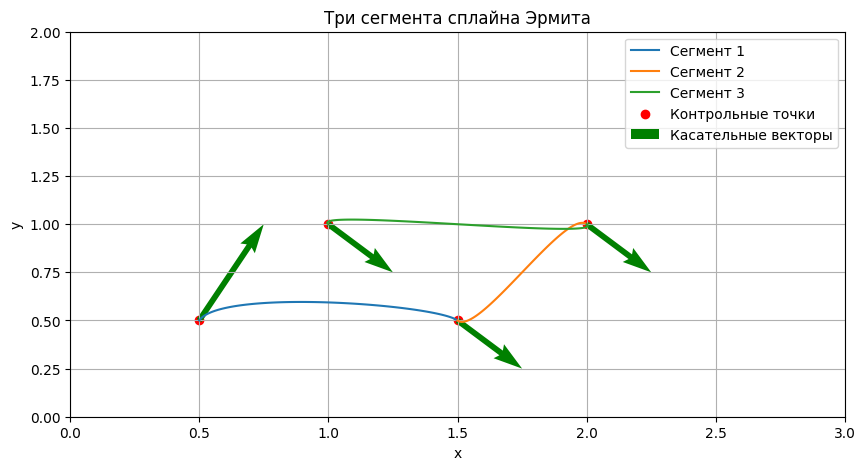

In [32]:
# Заданные точки и касательные векторы
p0 = np.array([0.5, 0.5])
p1 = np.array([1.5, 0.5])
p2 = np.array([2.0, 1.0])
p3 = np.array([1.0, 1.0])
v0 = np.array([0.25, 0.5])
v1 = np.array([0.25, -0.25])
v2 = np.array([0.25, -0.25])
v3 = np.array([0.25, -0.25])

# Базисные полиномы
def h00(tau):
    return 2 * tau**3 - 3 * tau**2 + 1

def h10(tau):
    return tau**3 - 2 * tau**2 + tau

def h01(tau):
    return -2 * tau**3 + 3 * tau**2

def h11(tau):
    return tau**3 - tau**2

# Расчет сегментов сплайна
def r1(tau, p0, v0, p1, v1):
    return h00(tau) * p0 + h10(tau) * v0 + h01(tau) * p1 + h11(tau) * v1

def r2(tau, p1, v1, p2, v2):
    return h00(tau) * p1 + h10(tau) * v1 + h01(tau) * p2 + h11(tau) * v2

def r3(tau, p2, v2, p3, v3):
    return h00(tau) * p2 + h10(tau) * v2 + h01(tau) * p3 + h11(tau) * v3

# Расчет значений сегментов сплайна для заданных точек и касательных векторов
tau_values = np.linspace(0, 1, 100)
r1_values = np.array([r1(tau, p0, v0, p1, v1) for tau in tau_values])
r2_values = np.array([r2(tau, p1, v1, p2, v2) for tau in tau_values])
r3_values = np.array([r3(tau, p2, v2, p3, v3) for tau in tau_values])

# Построение графика

plt.figure(figsize=(10, 5))
plt.plot(r1_values[:, 0], r1_values[:, 1], label='Сегмент 1')
plt.plot(r2_values[:, 0], r2_values[:, 1], label='Сегмент 2')
plt.plot(r3_values[:, 0], r3_values[:, 1], label='Сегмент 3')
plt.scatter([p0[0], p1[0], p2[0], p3[0]], [p0[1], p1[1], p2[1], p3[1]], color='red', label='Контрольные точки')
plt.quiver([p0[0], p1[0], p2[0], p3[0]], [p0[1], p1[1], p2[1], p3[1]],
           [v0[0], v1[0], v2[0], v3[0]], [v0[1], v1[1], v2[1], v3[1]],
           angles='xy', scale_units='xy', scale=1, color='green', label='Касательные векторы')
plt.xlim(0, 3)
plt.ylim(0, 2)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Три сегмента сплайна Эрмита')
plt.legend()
plt.grid(True)
plt.show()



Теперь построим график для трех сегментов сплайна, используя аппроксимированные касательные векторы.

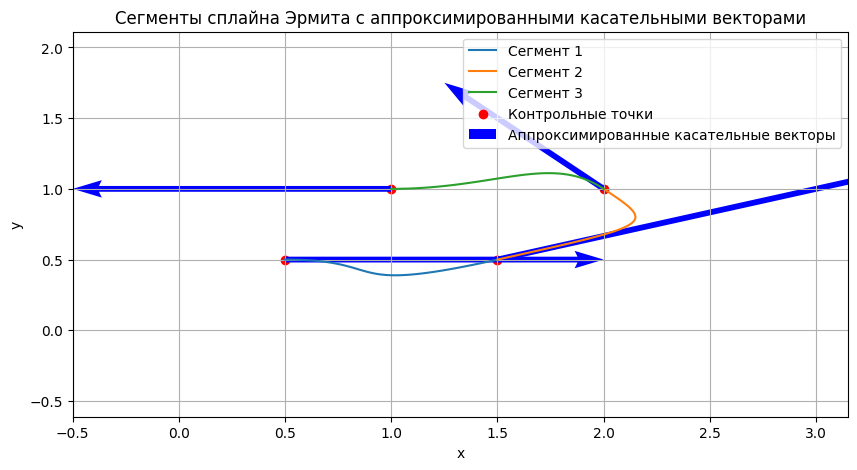

In [33]:
# Расчет аппроксимированных касательных векторов с использованием тройных конечных разностей
v0_prime = 1.5 * (p1 - p0)
v1_prime = 1.5 * (p2 - p0)
v2_prime = 1.5 * (p3 - p1)
v3_prime = 1.5 * (p3 - p2)

# Расчет значений сегментов сплайна для аппроксимированных касательных векторов
r1_values_prime = np.array([r1(tau, p0, v0_prime, p1, v1_prime) for tau in tau_values])
r2_values_prime = np.array([r2(tau, p1, v1_prime, p2, v2_prime) for tau in tau_values])
r3_values_prime = np.array([r3(tau, p2, v2_prime, p3, v3_prime) for tau in tau_values])

# Настройка осей графика для лучшего отображения
xmin = min([r1_values_prime[:, 0].min(), r2_values_prime[:, 0].min(), r3_values_prime[:, 0].min()]) - 1
xmax = max([r1_values_prime[:, 0].max(), r2_values_prime[:, 0].max(), r3_values_prime[:, 0].max()]) + 1
ymin = min([r1_values_prime[:, 1].min(), r2_values_prime[:, 1].min(), r3_values_prime[:, 1].min()]) - 1
ymax = max([r1_values_prime[:, 1].max(), r2_values_prime[:, 1].max(), r3_values_prime[:, 1].max()]) + 1

# Построение графика для аппроксимированных касательных векторов с корректировкой масштаба
plt.figure(figsize=(10, 5))
plt.plot(r1_values_prime[:, 0], r1_values_prime[:, 1], label='Сегмент 1')
plt.plot(r2_values_prime[:, 0], r2_values_prime[:, 1], label='Сегмент 2')
plt.plot(r3_values_prime[:, 0], r3_values_prime[:, 1], label='Сегмент 3')
plt.scatter([p0[0], p1[0], p2[0], p3[0]], [p0[1], p1[1], p2[1], p3[1]], color='red', label='Контрольные точки')
plt.quiver([p0[0], p1[0], p2[0], p3[0]], [p0[1], p1[1], p2[1], p3[1]], [v0_prime[0], v1_prime[0], v2_prime[0], v3_prime[0]], [v0_prime[1], v1_prime[1], v2_prime[1], v3_prime[1]], angles='xy', scale_units='xy', scale=1, color='blue', label='Аппроксимированные касательные векторы')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Сегменты сплайна Эрмита с аппроксимированными касательными векторами')
plt.legend()
plt.grid(True)
plt.axis([xmin, xmax, ymin, ymax])
plt.show()

plt.show()


-----

## № 2

-----

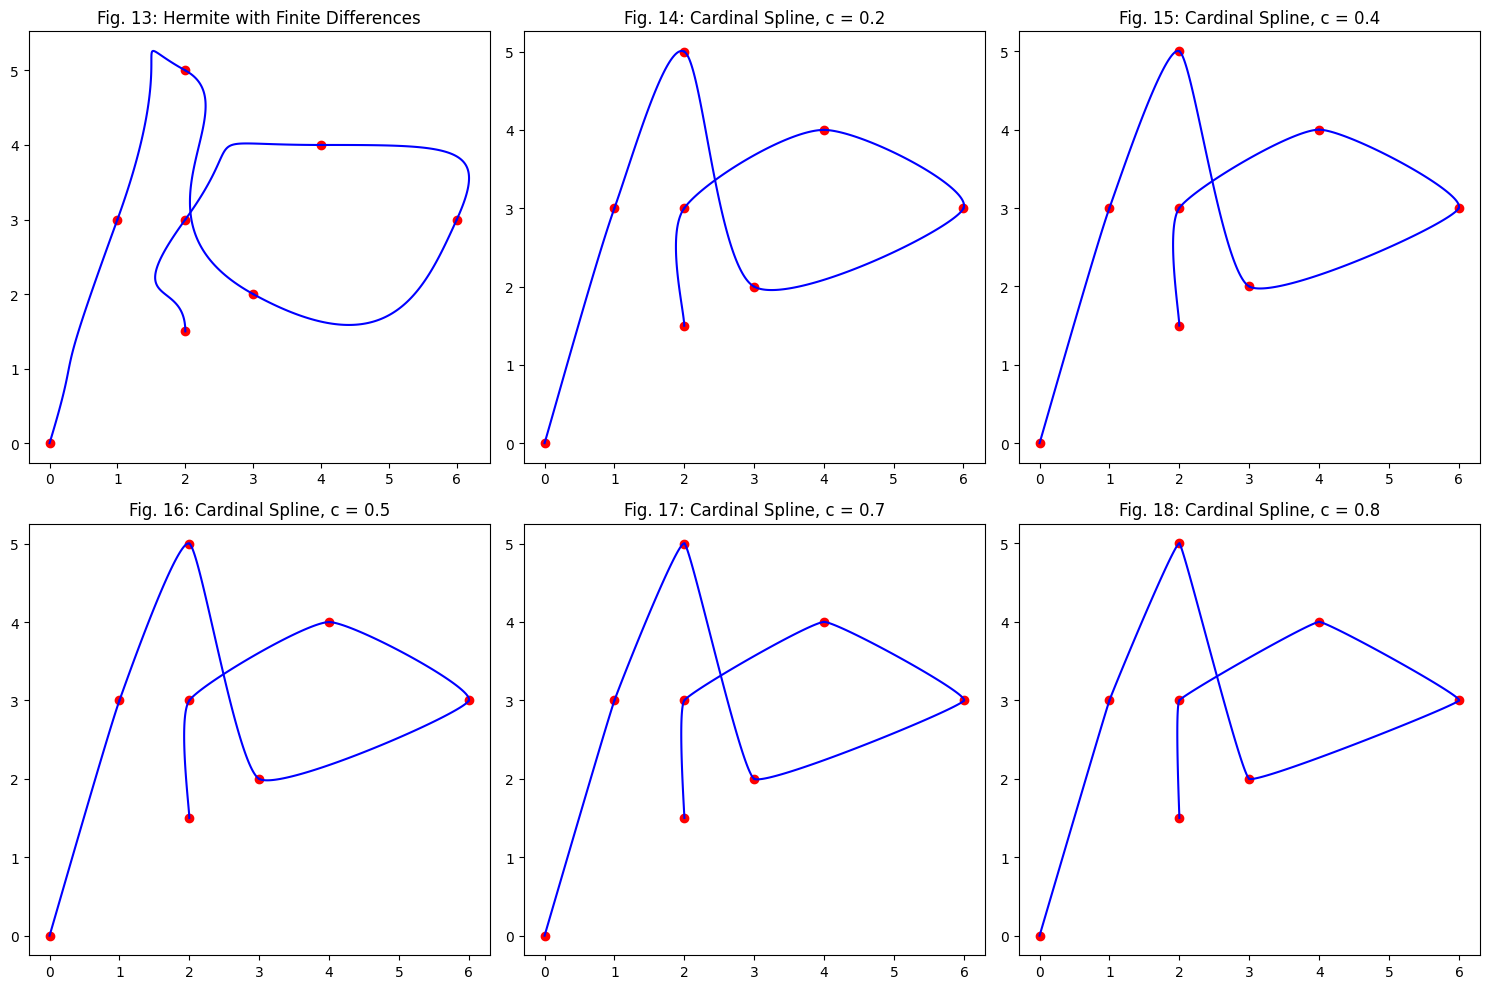

In [21]:
# Определение функции для вычисления касательных векторов для кардинального сплайна
def cardinal_tangents(points, c):
    tangents = []
    for i in range(len(points)):
        if i == 0:
            tangents.append((1 - c) * (points[i + 1] - points[i]) / 2)
        elif i == len(points) - 1:
            tangents.append((1 - c) * (points[i] - points[i - 1]) / 2)
        else:
            tangents.append((1 - c) * (points[i + 1] - points[i - 1]) / 2)
    return np.array(tangents)

# Переопределение точек и тангенсов
points = np.array([(0, 0), (1, 3), (2, 5), (3, 2), (6, 3), (4, 4), (2, 3), (2, 1.5)])
tangents_approx = [
    1.5 * (points[1] - points[0]),
    1.5 * (points[2] - points[0]),
    1.5 * (points[3] - points[1]),
    1.5 * (points[4] - points[2]),
    1.5 * (points[5] - points[3]),
    1.5 * (points[6] - points[4]),
    1.5 * (points[7] - points[5]),
    1.5 * (points[7] - points[6])
]

fig, axs = plt.subplots(2, 3, figsize=(15, 10))

# Рис. 13: Эрмитов сплайн с аппроксимацией тройными конечными разностями
draw_spline(axs[0, 0], points, tangents_approx, "Fig. 13: Hermite with Finite Differences")

# Рисунки 14-18: Кардинальные сплайны с различными значениями c
for ax, c in zip(axs.flat[1:], c_values):
    tangents_cardinal = cardinal_tangents(points, c)
    draw_spline(ax, points, tangents_cardinal, f"Fig. {14 + c_values.index(c)}: Cardinal Spline, c = {c}")

plt.tight_layout()
plt.show()


Вопрос: `На что влияет параметр c?`

Параметр **c** в кардинальном сплайне определяет "поворотность" кривой. Когда **c = 1**, кардинальный сплайн становится катмулл-ромовым сплайном, который проходит через все контрольные точки без изгибов. Когда **c = 0**, кривая становится более гладкой и округлой.

## №3

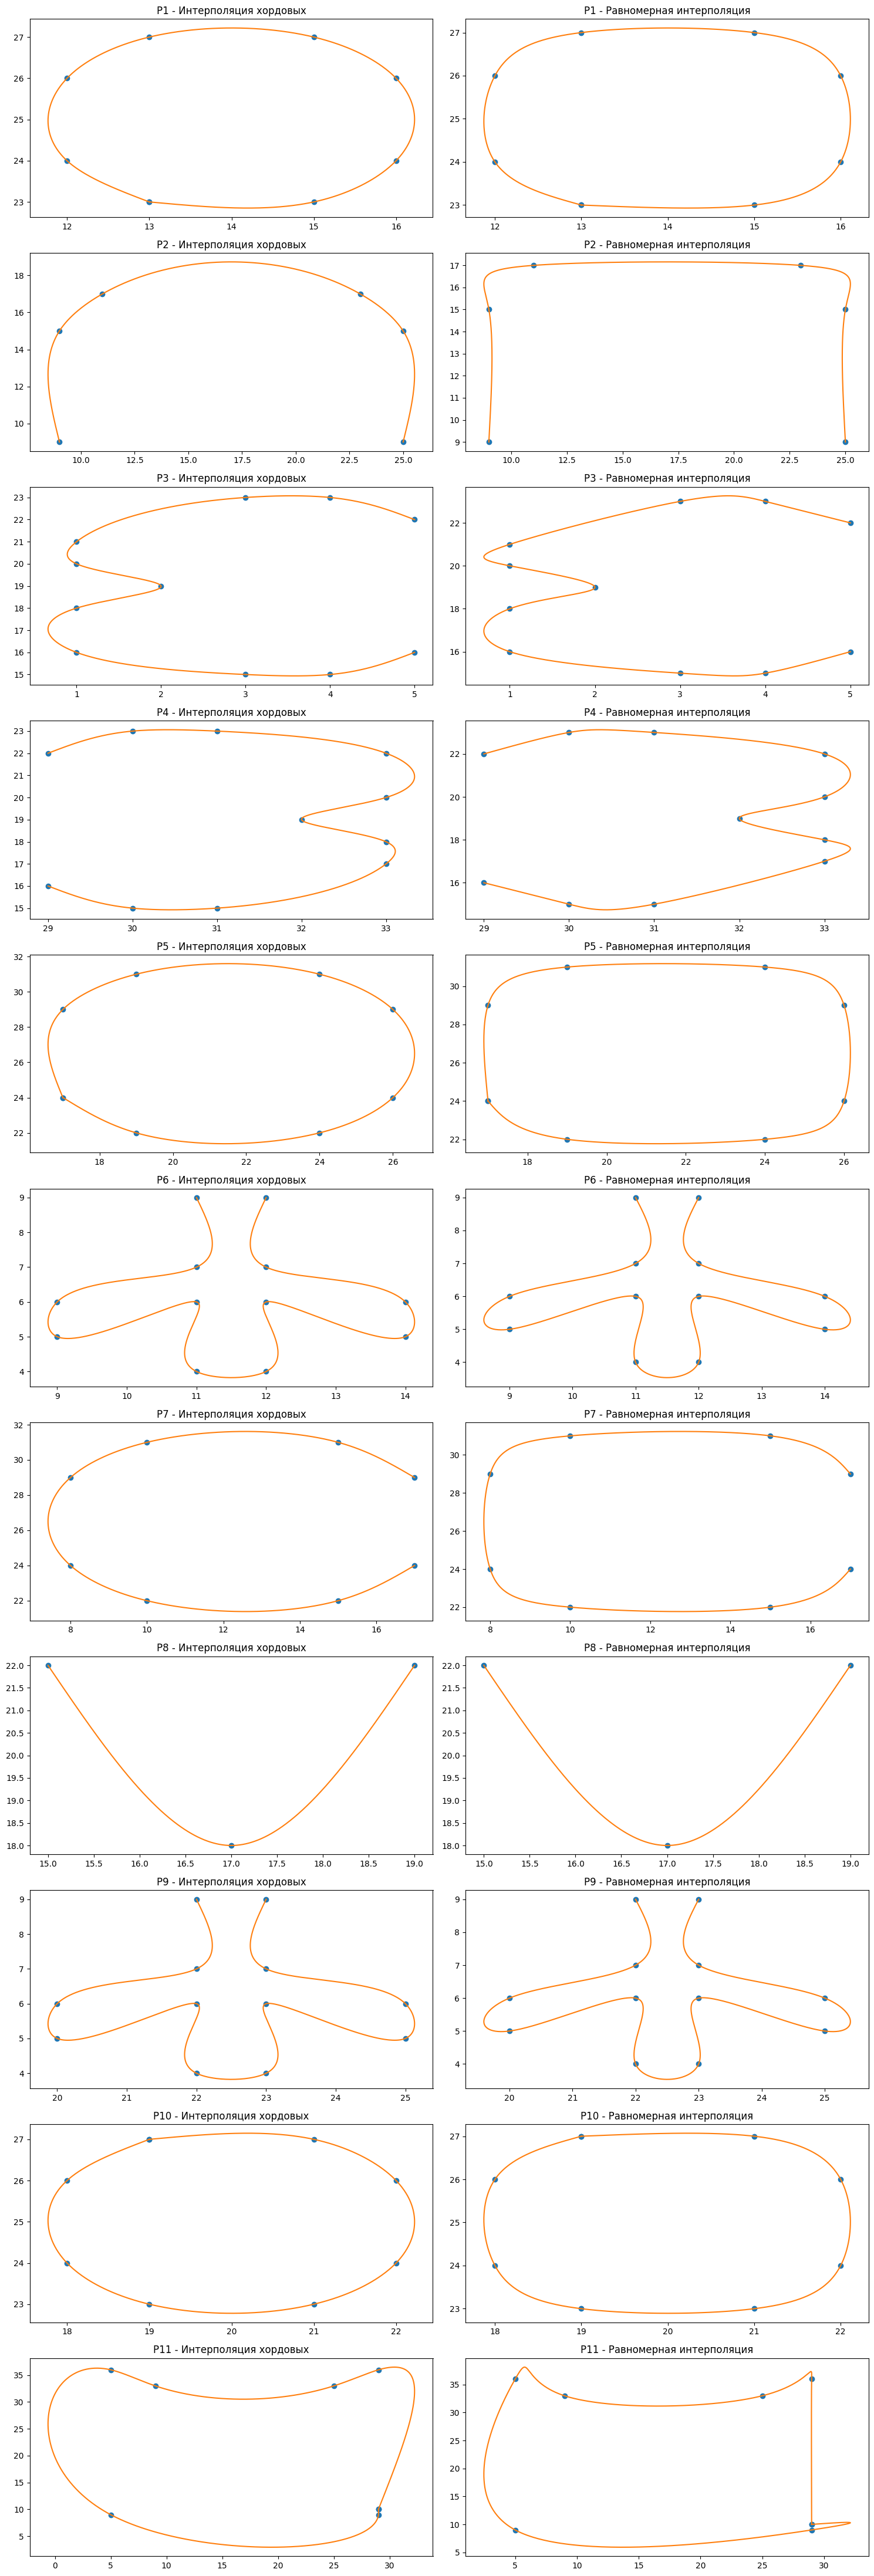

In [26]:
# Определение групп точек
P = [
    np.array([(13, 23.), (15, 23.), (16, 24.), (16, 26.), (15, 27.), (13, 27.), (12, 26.), (12, 24.), (13, 23.)]),
    np.array([(9, 9.), (9, 15.), (11, 17.), (23, 17.), (25, 15.), (25, 9.)]),
    np.array([(5, 22.), (4, 23.), (3, 23.), (1, 21.), (1, 20.), (2, 19.), (1, 18.), (1, 16.), (3, 15.), (4, 15.), (5, 16.)]),
    np.array([(29, 16.), (30, 15.), (31, 15.), (33, 17.), (33, 18.), (32, 19.), (33, 20.), (33, 22.), (31, 23.), (30, 23.), (29, 22.)]),
    np.array([(17, 24.), (19, 22.), (24, 22.), (26, 24.), (26, 29.), (24, 31.), (19, 31.), (17, 29.), (17, 24.)]),
    np.array([(11, 9.), (11, 7.), (9, 6.), (9, 5.), (11, 6.), (11, 4.), (12, 4.), (12, 6.), (14, 5.), (14, 6.), (12, 7.), (12, 9.)]),
    np.array([(17, 29.), (15, 31.), (10, 31.), (8, 29.), (8, 24.), (10, 22.), (15, 22.), (17, 24.)]),
    np.array([(19, 22.), (17, 18.), (15, 22.)]),
    np.array([(22, 9.), (22, 7.), (20, 6.), (20, 5.), (22, 6.), (22, 4.), (23, 4.), (23, 6.), (25, 5.), (25, 6.), (23, 7.), (23, 9.)]),
    np.array([(19, 27.), (21, 27.), (22, 26.), (22, 24.), (21, 23.), (19, 23.), (18, 24.), (18, 26.), (19, 27.)]),
    np.array([(29, 10.), (29, 9.), (5, 9.), (5, 36.), (9, 33.), (25, 33.), (29, 36.), (29, 10.)])
]

# Функция для расчета опорных точек на основе хордовой интерполяции
def chordal_parametrization(points):
    t = [0]
    for i in range(1, len(points)):
        t.append(t[-1] + np.linalg.norm(points[i] - points[i-1]))
    return np.array(t)

# Визуализация
fig, axs = plt.subplots(len(P), 2, figsize=(15, 4 * len(P)))

for idx, points in enumerate(P):
    # Хордовая интерполяция
    t_chordal = chordal_parametrization(points)
    cs_chordal = CubicSpline(t_chordal, points, bc_type='natural')
    axs[idx, 0].plot(points[:, 0], points[:, 1], 'o', label='Точки данных')
    xs = np.linspace(min(t_chordal), max(t_chordal), 1000)
    axs[idx, 0].plot(cs_chordal(xs)[:, 0], cs_chordal(xs)[:, 1], label='Интерполяция хордовых')
    axs[idx, 0].set_title(f'P{idx+1} - Интерполяция хордовых')

    # Равномерная интерполяция
    t_uniform = np.arange(len(points))
    cs_uniform = CubicSpline(t_uniform, points, bc_type='natural')
    axs[idx, 1].plot(points[:, 0], points[:, 1], 'o', label='Точки данных')
    xs = np.linspace(min(t_uniform), max(t_uniform), 1000)
    axs[idx, 1].plot(cs_uniform(xs)[:, 0], cs_uniform(xs)[:, 1], label='Равномерная интерполяция')
    axs[idx, 1].set_title(f'P{idx+1} - Равномерная интерполяция')

plt.tight_layout()
plt.show()


-----